## Introduction

[Pytorch](http://pytorch.org/) is a Python based scientific computing package targeted at two sets of audiences:

- A replacement for [NumPy](http://www.numpy.org/) to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

It is easy-to-use and very powerful in nowadays machine learning research and applications, thus a very good resource for practical data science. 

### Turtorial Content

This turtorial will introduce basic concepts of PyTorch, and how to write code and build simple networks using PyTorch. We will walk through the usage of PyTorch by codes and examples. After this turtorial, you will be able to write your own PyTorch programms to work on machine learning projects. 

We will cover the following topics in this tutorial:
- [Installing PyTorch](#Installing-PyTorch)
- [Tensors](#Tensors)
- [Linear Regression Recap](#Linear-Regression-Recap)
- [Autograd](#Autograd)
- [Modules](#Modules)


### Installing PyTorch

PyTorch is available in both OSX and Linux operating system. To install PyTorch in your computer, you can use either package manager such as Anaconda or pip, or even build from the source.

I recommend install from conda by simply running: 

    $ conda install pytorch torchvision -c pytorch
   
For pip user, run:

    $ pip3 install http://download.pytorch.org/whl/cu80/* [depends on your python distribution]
$ pip3 install torchvision

If you want to build from the source, you can follow instructions at this URL: [https://github.com/pytorch/pytorch#from-source](https://github.com/pytorch/pytorch#from-source)

In [1]:
from __future__ import print_function
import torch as t
import numpy as np

### Tensors
Tensors the most basic data structure in PyTorch. They are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

To start with, we can use `torch.Tensor` to create a uninitialized tensor. There are also many ways to initialize a tensor: 

|Function|Explaination|
|:---:|:---:|
|Tensor(\*sizes)|Default constructor|
|ones(\*sizes)|All 1 Tensor|
|zeros(\*sizes) |All 0 Tensor|
|eye(\*sizes)|Tensor with 1 in the diagnoal, 0 otherwise
|rand(\*sizes)|Tensor with unifrom distribution from [0, 1)|
|normal(mean,std)/uniform(from,to)| Normal distribution/Uniform distribution|
|randperm(m)|Random permutation|

In [2]:
a = t.Tensor(2, 2)
a


 0.0000e+00 -1.0842e-19
-1.2770e+18 -8.5920e+09
[torch.FloatTensor of size 2x2]

In [3]:
b = t.rand(2, 3)
b


 0.8041  0.1639  0.7512
 0.6218  0.8691  0.3176
[torch.FloatTensor of size 2x3]

In [4]:
c = t.ones(2, 3)
c


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [5]:
d = t.eye(2, 3)
d


 1  0  0
 0  1  0
[torch.FloatTensor of size 2x3]

You can also pass in a list or other sequence data structres to construct a tensor, so that we can utilize numpy, pandas for preprocess and feed the results to PyTorch conveniently.

In [6]:
l = t.Tensor([[1,2,3],[4,5,6]])
l


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]

#### Basic tensor operations

To add two tensors, you can just use `+`, or you can use `torch.add`. 

In [7]:
# Equivelent to e = c + d
e = t.add(c, d) 
e


 2  1  1
 1  2  1
[torch.FloatTensor of size 2x3]

Similar to add, we have `torch.mul` and * for tensors multiply.

In [8]:
# Equivelent to f = c * d
f = t.mul(c, d)
f


 1  0  0
 0  1  0
[torch.FloatTensor of size 2x3]

You can perform element-wise operation such as `abs/sqrt/div/fmod/log/pow`... And trigonometric function such as `cos/sin/asin/atan`... Activation function such as `sigmod/tan/clamp`... etc.


In [9]:
g = t.div(e, 3)
g


 0.6667  0.3333  0.3333
 0.3333  0.6667  0.3333
[torch.FloatTensor of size 2x3]

In [10]:
h = t.randperm(5)
print(h)
# Elements larger than 2 is set to 2
h = t.clamp(h, max=2)
h


 4
 1
 0
 3
 2
[torch.LongTensor of size 5]




 2
 1
 0
 2
 2
[torch.LongTensor of size 5]

#### Inplace mutation
From the view of storage, the operations on tensor could also be divided into two class:
    - Operations that modify tensor inplace.
    - Operations that does not modify the original tensor.
All method that end with `_` works in a inplace way.
The result of `a.add(b)` will be stored in a new tensor, while the result of `a.add_(b)` will be stored in tensor a, thus a is modified.

In [11]:
i = t.ones(3)
# i will be modified by this operation
i.add_(i)


 2
 2
 2
[torch.FloatTensor of size 3]

#### Indexing
Indexing in PyTorch is similar to numpy, too. You can index the tensor by row, by column, and both.

In [12]:
j = t.rand(2, 3)
print(j)
# Access element
j[0, 2]


 0.5322  0.4845  0.4775
 0.2852  0.5160  0.9476
[torch.FloatTensor of size 2x3]



0.4775139093399048

In [13]:
# Access the first row
j[0]


 0.5322
 0.4845
 0.4775
[torch.FloatTensor of size 3]

In [14]:
# Access the third column
j[:, 2]


 0.4775
 0.9476
[torch.FloatTensor of size 2]

#### View

Pytorch provides a way to change the size of a tensor by calling `tensor.view`. It only changes the size of the tensor, while the underlying content remains the same, pretty much like numpy reshape, so the order is the same as the order in the underlying tensor.

In [15]:
a = t.rand(2, 1, 2, 1)
print(a)
# -1 tells the PyTorch to calculate the size automaticly
a = a.view(2, 1, -1)
a


(0 ,0 ,.,.) = 
  0.9423
  0.2188

(1 ,0 ,.,.) = 
  0.2738
  0.6368
[torch.FloatTensor of size 2x1x2x1]




(0 ,.,.) = 
  0.9423  0.2188

(1 ,.,.) = 
  0.2738  0.6368
[torch.FloatTensor of size 2x1x2]

`tensor.squeeze` can be helpful if you want to eliminate dimensions that only has 1 entry. `tensor.unsqueeze` is the corresponding reverse operation.

In [16]:
# The size is now 2*2
a.squeeze_()
print(a)
# The size is now 1*2*2
a.unsqueeze_(0)
a


 0.9423  0.2188
 0.2738  0.6368
[torch.FloatTensor of size 2x2]




(0 ,.,.) = 
  0.9423  0.2188
  0.2738  0.6368
[torch.FloatTensor of size 1x2x2]

#### Cuda Operations

Tensors can be moved onto GPU using the .cuda method. In the real world deep learning scenario, computing in parallel is extremly powerful and efficient.

In [17]:
# Run this cell only if CUDA is available
x = t.rand(2, 2)
y = t.rand(2, 2)
if t.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)

### Linear Regression Recap

As we discussed in the class, linear regression is a widely used in the statistics and analysis to determine the dependency between a scalar dependent variable $\textbf{y}$ and one or more independent variables denoted $\textbf{X}$. We try to find approriate $\textbf{w}$ and $\textbf{b}$ such that $y = wx + b$. We'll use a loss function to measure the distance between our estimated w/b and the actual w/b. By minimizing the loss function, we can learn the estimate value of w and b.

We define the loss function as:
$$loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2$$
Which can be solved by gradient descent or [stochastic gradient descent](http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/). 

Let's walk through a simple dataset to solve a linear regression problem. This small [dataset](http://users.stat.ufl.edu/~winner/data/nba_ht_wt.csv) contains the result of NBA 2013-2014 Player's Heights and Weights.

In [18]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [19]:
# Loading data from pandas
data_frame = pd.read_csv('nba_ht_wt.csv', encoding='ISO-8859-1')
h_w_frame = data_frame[['Height', 'Weight']]
X = h_w_frame.iloc[:, 0]
Y = h_w_frame.iloc[:, 1]
n = h_w_frame.shape[0]

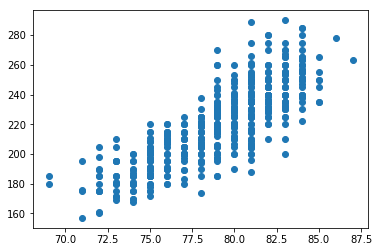

In [20]:
plt.scatter(X, Y)

In [21]:
lr = 0.0001 # learning rate
epochs = 5000 # number of iteration

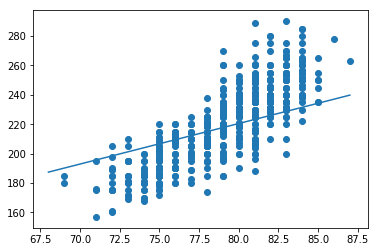

2.7589433193206787 -0.225871279835701


In [22]:
# Initialize parameters
w = t.rand(1, 1) 
b = t.zeros(1, 1)

for epoch in range(epochs):
    data = t.Tensor(h_w_frame.iloc[np.random.choice(n), :].as_matrix())
    x = data[0]
    y = data[1]
    
    # Predict
    y_pred = x * w + b 
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # Calculate the gradient 
    dy_pred = (y_pred - y)
    
    dw = x * dy_pred
    db = dy_pred.sum()
    
    # Update weight and bias
    w.sub_(lr * dw)
    b.sub_(lr * db)

# Plot the result
x = t.arange(68, 88).view(-1, 1)
y = x * w + b
plt.plot(x.numpy(), y.numpy())
plt.scatter(X, Y)
plt.show()
print(w.squeeze()[0], b.squeeze()[0])


### Autograd

The problem of the above code is that we need to compute the gradient ourselves. It works well if the gradient is easy to compute while it may not be the case if we are dealing with more complicate network.

PyTorch provides a effecient way to help build large network and compute the gradient automaticly. The `torch.autograd` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

`autograd.Variable` is a wrapper class for Tensor to do the autograd. It stores all the operation on it and computes the gradients after you call `backward()`. After the computation, the raw tensor data can be accessed through `.data` attribute, while the gradient data can be accessed through `.grad` attribute. 

In [23]:
from torch.autograd import Variable

Let first walk through the basic usage of `autograd.Variable`. By defineing a `Variable`, you can do what ever you want to it and the PyTorch will do all the muddy stuff for you. After calling `backward`, the gradient of each variable w.r.t the final result is stored in the `.grad` attribute.

In [24]:
# Create a autograd.Variable
x = Variable(t.rand(2, 3), requires_grad=True)
print(x)

# Do whatever operation on the variable
y = x.pow(2) + 5
z = y.mean()

# Compute gradient and do the backprop
z.backward()

# Gradient of x w.r.t z
print(x.grad)

Variable containing:
 0.6125  0.6634  0.1670
 0.8409  0.1445  0.2994
[torch.FloatTensor of size 2x3]

Variable containing:
 0.2042  0.2211  0.0557
 0.2803  0.0482  0.0998
[torch.FloatTensor of size 2x3]



With the help of autograd, we can now re-write our linear regression code more concisely. The parameters in the networks are now all Variable. 

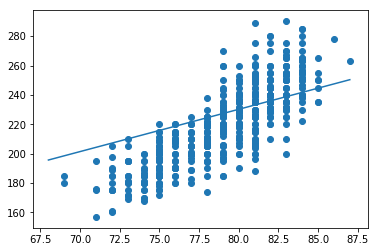

2.8800222873687744 -0.2279701828956604


In [25]:
w = Variable(t.rand(1,1), requires_grad=True)
b = Variable(t.zeros(1,1), requires_grad=True)

for epoch in range(epochs):
    data = h_w_frame.iloc[np.random.choice(n), :]
    # item() is used to get the int from np.int64
    x = Variable(t.ones(1) * data[0].item())
    y = Variable(t.ones(1) * data[1].item())
    
    y_pred = x * w + b 
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    loss.backward()
    
   # Update parameter
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # Zero out gradient
    w.grad.data.zero_()
    b.grad.data.zero_()
    
x = t.arange(68, 88).view(-1, 1)
y = x * w.data + b.data
plt.plot(x.numpy(), y.numpy())
plt.scatter(X, Y)
plt.show()
print(w.data.squeeze()[0], b.data.squeeze()[0])

### Modules

We have already known that PyTorch can help us abstract away the pain of calculating the gradient. But still, we need to write a lot of redundant code building and connecting the basic machine learning components. PyTorch uses `nn.Module` to provide higher level abstraction thus make the network more modular and easy to code.

In [26]:
import torch.nn as nn
import torch.optim as optim

All network structure should inherit the `nn.Module` class, which can also has many sub modules. We'll need to define the component within the `init` method and connect the network in the `forward` method. For example, in a linear network, we can define a network like below: 

In [27]:
class LinearModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        # Calling Super Class's constructor
        super(LinearModel, self).__init__() 
        
        self.weight = nn.Parameter(t.randn(input_dim, output_dim))
        self.bias = nn.Parameter(t.randn(output_dim))

    def forward(self, x):
        out = x * self.weight + self.bias
        return out

Loss function is also designed as a sub class of `nn.Module`, though we usually want to extract them out and make them independent from the network. There are many predefined loss function such as `MSELoss()` and `CrossEntropyLoss()`, etc.

In [28]:
y = Variable(t.randn(2, 2))
label = Variable(t.randn(2, 2))

criterion = nn.MSELoss()
loss = criterion(y, label)
loss

Variable containing:
 2.0062
[torch.FloatTensor of size 1]

PyTorch encapsulates the optimizing methods into `torch.optim`, and it is very easy to extend. You need to declare the parameter to optimize as well as the learning rate. The actual work will be done in `.step()` call. Note that you need to zero out the gradient each time you update something.

In [29]:
net = LinearModel(1, 1)
# Define an adam optimizer
optimizer = optim.SGD(params=net.parameters(), lr=lr)
optimizer.zero_grad() 

input = Variable(t.randn(1, 1))
output = net(input)
output.backward(output) 

# Update parameters
optimizer.step()

Combine what we learned above, we can now build a linear regression network and start training using mean square loss function and SGD as optimizer, and use the predefiend network model.

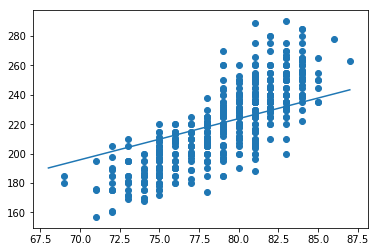

2.8014142513275146 -0.2901085615158081


In [30]:
# Wnn.Linear is a predefined linear network works the same as our LinearModel
model = nn.Linear(1,1)

# X, Y should be Variable
X_ = X.as_matrix().astype('float').reshape(-1, 1)
X_ = Variable(t.Tensor(X_))
Y_ = Y.as_matrix().astype('float').reshape(-1, 1)
Y_ = Variable(t.Tensor(Y_))

loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(epochs):
    output = model(X_)
    optimizer.zero_grad()

    loss = loss_func(output, Y_)
    loss.backward()
    optimizer.step()
    
x = Variable(t.arange(68, 88).view(-1, 1))
y = model(x)
plt.plot(x.data.numpy(), y.data.numpy())
plt.scatter(X, Y)
plt.show()
print(model.weight.data.squeeze()[0], model.bias.data[0])

For now we have built toy network from scratch. But we can do more with PyTorch and build more advanced neural network. In `torch.nn.functional` and `torch.nn` package, we can many helpful functions such as convolutional, activation functions, and even complex network structure such as `LSTM` or `ResNet` in [torchvison](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py). We won't go that further in this turtorial, but it's very helpful as an advanced reading material.

![Convnet](http://pytorch.org/tutorials/_images/mnist.png)
<center>*Convenet*</center>                


### Reference
1. PyTorch: http://http://pytorch.org/
2. PyTorch source code: https://github.com/pytorch/pytorch
2. Miscellaneous Datasets: http://users.stat.ufl.edu/~winner/datasets.html
3. Matplotlib: https://matplotlib.org/
4. TorchVision: https://github.com/pytorch/vision